# Groundwater Flow to Wells - IV

## Well Interference (pp. 212-213)

Well interference is the situation where the effect of one well impacts a nearby well, it is a particular kind of superposition.

### Superposition (pp. 213-216) 

A technique of adding solutions (perhaps adjusted in space and time) to mimic response of complex systems as an array of simple systems.

![](superp1.png)

![](superp2.png)

![](superp3.png)

![](superp4.png)

![](superp5.png)

![](superp6.png)

In [1]:
# Build a simulator in class.

In [2]:
def W(u): # Theis well function using exponential integral
    import scipy.special as sc
    w = sc.expn(1,u)
    return(w)

def s(radius,time,storage,transmissivity,discharge): # Drawdown function using exponential integral
    import math
    u = ((radius**2)*(storage))/(4*transmissivity*time)
    s = ((discharge)/(4*math.pi*transmissivity))*W(u)
    return(s)

In [3]:
# wellfield simulator 
import math
# aquifer properties
T = 1.0 #m2/d
S = 0.0005 #some pretty small value - confined
t = 365. # specify simulation time
# pumping/injection wells [wellID,xloc,yloc,Q]
pmpwells =[[1,-1200,0,100.],\
[2, 1200,0,100.]]
# observation wells
obswells = [\
 [1,-1000,0],\
 [2,-900,0],\
 [3,-800,0],\
 [4,-700,0],\
 [5,-600,0],\
 [6,-500,0],\
 [7,-400,0],\
 [8,-300,0],\
 [9,-200,0],\
 [10,0,0]\
]
ddnobs = [0 for i in range(len(obswells))]
for iobs in range(len(obswells)):
    for jpmp in range(len(pmpwells)):
        distance = math.sqrt((obswells[iobs][1]-pmpwells[jpmp][1])**2 + (obswells[iobs][2]-pmpwells[jpmp][2])**2)
        pumpage = float(pmpwells[jpmp][3])
        ddn = s(distance,t,S,T,pumpage)
        ddnobs[iobs]=ddnobs[iobs]+ddn
    
position = [0 for i in range(len(obswells))]
for i in range(len(obswells)):
    position[i]=obswells[i][1]
    
# import the package

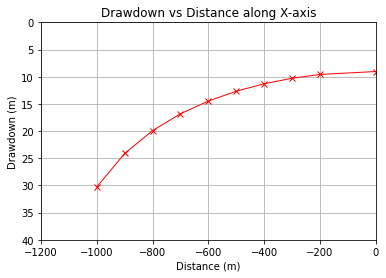

In [4]:
import matplotlib.pyplot as plt
graph, (plot1) = plt.subplots(1, 1) # create a 1X1 plotting frame
# Code adapted from: https://www.geeksforgeeks.org/how-to-reverse-axes-in-matplotlib/
plot1.plot(position, ddnobs, c='red', marker='x',linewidth=1) # basic line plot
#plot1.set_xscale('log') # set x-axis to display a logarithmic scale #################
plot1.set_ylim([0,40])
plot1.set_xlim([-1200,0])
plot1.invert_yaxis()
plot1.set_xlabel('Distance (m)') # label the x-axis
plot1.set_ylabel('Drawdown (m)') # label the y-axis, notice the LaTex markup
plot1.set_title('Drawdown vs Distance along X-axis') # make a plot title
plot1.grid() # display a grid
plt.show() # display the plot

## Recovery Tests (pp. 216-218)

A recovery test uses a short term pumping interval then observes the recovery allowing for the use of a single well to infer both transmissivity and storage properties.  It is esentially an application of superposition in time (also called convolution)

A simple example using a Theis solution is illustrated below.

**Example**

An aquifer with $T=50 m^2/d$, $S=6 \times 10^{-5}$ is pumped at a rate of 1000 $m^3/d$ for 6 hours.  Neglecting any well losses, plot the drawdown vs time for the aquifer, every minute for one day (1440 minutes) at a radius of 15.24 m. 

In [5]:
def W(u): # Theis well function using exponential integral
    import scipy.special as sc
    w = sc.expn(1,u)
    return(w)

def s(radius,time,storage,transmissivity,discharge): # Drawdown function using exponential integral
    import math
    u = ((radius**2)*(storage))/(4*transmissivity*time)
    s = ((discharge)/(4*math.pi*transmissivity))*W(u)
    return(s)

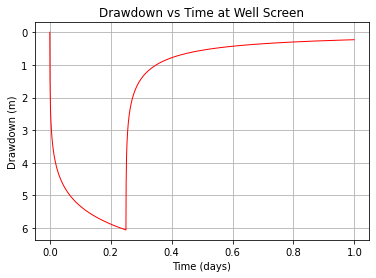

In [6]:
import math
# aquifer properties
Q = 500 #m^3/day
T = 50.0 #m2/d
S = 0.00006 #some pretty small value - confined
t = [0 for i in range(1440)]
radius =15.24 # radius in meters
for i in range(1440):
    t[i]=float(i/1440.0) # time in days
# now for some trickery to figure out the drawdowns
ddn1 = [0 for i in range(1440)] # well starting at time 0
ddn2 = [0 for i in range(1440)] # time image well at time 6 hrs (360 minutes)

# well starting at time 0
for i in range(1,1440):
    ddn1[i]=s(radius,t[i],S,T,Q)
# well starting at time 6 hrs
    if i > 360: 
        ddn2[i]=s(radius,t[i]-(360/1440),S,T,-Q) #note the sign change, and time shift
# now add the drawdowns
for i in range(0,1440):
    ddn1[i]=ddn1[i]+ddn2[i]
# now the plot
import matplotlib.pyplot as plt
graph, (plot1) = plt.subplots(1, 1) # create a 1X1 plotting frame
# Code adapted from: https://www.geeksforgeeks.org/how-to-reverse-axes-in-matplotlib/
plot1.plot(t, ddn1, c='red',linewidth=1) # basic line plot
#plot1.set_xscale('log') # set x-axis to display a logarithmic scale #################
#plot1.set_ylim([0,40])
#plot1.set_xlim([-1200,0])
plot1.invert_yaxis()
plot1.set_xlabel('Time (days)') # label the x-axis
plot1.set_ylabel('Drawdown (m)') # label the y-axis, notice the LaTex markup
plot1.set_title('Drawdown vs Time at Well Screen') # make a plot title
plot1.grid() # display a grid
plt.show() # display the plot

One can conduct such a test in the well and by fitting observations to the recovery curve, infer the formation constants.